<a href="https://colab.research.google.com/github/EkaterinaVZ/neural_networks_in_agriculture/blob/main/%D0%9D%D0%B0%D1%81%D0%B5%D0%BA%D0%BE%D0%BC%D1%8B%D0%B5_%22ml_engineering_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Хакатон "Инженерия машинного обучения"

.

Не забудьте включить GPU (Среда выполнения->Сменить среду выполнения->Аппаратный ускоритель->GPU)

In [ ]:

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 

## Загружаем данные

High quality data set of images that contains insect species. The set allows to classify the insects. Extending of dataset volume and adding of the additional classes will make use of the set for the insect-pest detecting on the agricultural plants or for the automatically insect classification and insect census.
At the moment three classes of insects are included: ants(Formicidae), colorado beetle(Leptinotarsa decemlineata), ladybug(Coccinellidae).

**Dataset properties**

Total number of images: 1512.

Training set size: 1134 images.

Test set size: 378 images.

Number of classes: 3 (ants, colorado_beetle, ladybug).

Image size: 224x224 pixels.

Filename format: ants.index.jpg(e.g. ants.0.jpg), colorado_beetle.index.jpg(e.g. ladybug.19.jpg), 

Ants, colorado beetles, ladybugs belong to three different classes.

**Repository structure**

Folders Training and Test contain all images used for training and testing.

Insects belong to three different classes. The main part of images was unloaded using a script (code), then the images were checked and selected in manual way. Small part of the data consists of prepared photographs. It is a convenient tool for classifying fruits into ripe and unripe. If needed the additional required data (and classes) can be added to the set to expand the use of classification.

In [ ]:
!wget https://www.dropbox.com/s/2rxrttiyekd6mkr/train2.zip?dl=0 -O train.zip

--2021-11-28 15:42:50--  https://www.dropbox.com/s/2rxrttiyekd6mkr/train2.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2rxrttiyekd6mkr/train2.zip [following]
--2021-11-28 15:42:51--  https://www.dropbox.com/s/raw/2rxrttiyekd6mkr/train2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3eb49fa8a976ebbc369ef0bf89.dl.dropboxusercontent.com/cd/0/inline/Ba1SzGaW-X5OU7KbEs0xDf6FJVZGo1f1wWFTNDBH1ApQx2HhXfHqrWNrgjd1CE-6tcMElzR-_qNsWmfYPXErVkqV5H0Z6tvauNMvpOdaUn4BQ_bAzwauF-uy0bWbe7CfAXmVKsodAC6eJj5a6ZGILDTe/file# [following]
--2021-11-28 15:42:51--  https://uc3eb49fa8a976ebbc369ef0bf89.dl.dropboxusercontent.com/cd/0/inline/Ba1SzGaW-X5OU7KbEs0xDf6FJVZGo1f1wWFTNDBH1ApQx2HhXfHqrWNrgjd1CE-6tcMElzR-_qNsWmfYPXErVkqV5

In [ ]:
!wget https://www.dropbox.com/s/cs2v7xfl0h14fvr/test2.zip?dl=0 -O test.zip

--2021-11-28 15:42:56--  https://www.dropbox.com/s/cs2v7xfl0h14fvr/test2.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/cs2v7xfl0h14fvr/test2.zip [following]
--2021-11-28 15:42:56--  https://www.dropbox.com/s/raw/cs2v7xfl0h14fvr/test2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc71aae0f2ff1027c0646e5a313f.dl.dropboxusercontent.com/cd/0/inline/Ba1HK7o4yAgXgGc2_Bi7xYdUYP7AtI4XDI2Oa-nbaRxbhcv_K2LNI_w0Lfwtf5Lq_N3F7xkr2kRmDE7ILPGj_l5INNySKxDfAWwIcpWCWfYOzEVmNeN5EhDwoTIdjhVCIcqEQvWdJWFpFPehAaC_gRyV/file# [following]
--2021-11-28 15:42:57--  https://uc71aae0f2ff1027c0646e5a313f.dl.dropboxusercontent.com/cd/0/inline/Ba1HK7o4yAgXgGc2_Bi7xYdUYP7AtI4XDI2Oa-nbaRxbhcv_K2LNI_w0Lfwtf5Lq_N3F7xkr2kRmDE7ILPGj_l5INNySKx

In [ ]:
!ls 

sample_data  test.zip  train.zip


In [ ]:
!unzip -q train.zip

In [ ]:
!ls train

ants  colorado_beetle  ladybug


In [ ]:
# rm -r train

In [ ]:
!unzip -q test.zip

In [ ]:
!ls test

ants  colorado_beetle  ladybug


In [ ]:
!pwd

/content


Смотрим примеры картинок

In [ ]:
import os
os.listdir()
path = os.path.join(os.getcwd(),'/content/test/colorado_beetle/colorado_beetle.colorado_beetle.438.jpg')

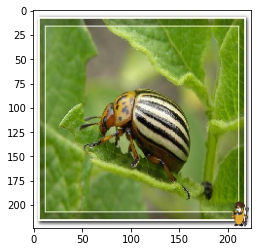

In [ ]:
img_path = path
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

## Создаем наборы данных

Набор данных для обучения

In [ ]:
train_dataset = image_dataset_from_directory('train',
                                             batch_size=128,
                                             image_size=(224, 224))

Found 1134 files belonging to 3 classes.


In [ ]:
class_names = train_dataset.class_names

In [ ]:
class_names

['ants', 'colorado_beetle', 'ladybug']

Набор данных для тестирования

In [ ]:
test_dataset = image_dataset_from_directory('test',
                                             batch_size=128,
                                             image_size=(224, 224))

Found 378 files belonging to 3 classes.


## Создаем составную нейронную сеть

In [ ]:
img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [ ]:
inputs = layers.Input(shape=(224, 224, 3))
x = img_augmentation(inputs)
model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

# Freeze the pretrained weights
model.trainable = False

# Rebuild top
x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
# Для задачи с двумя классами изображений
# outputs = layers.Dense(1, activation="sigmoid", name="pred")(x)
# Для задачи с несколькими классами изображений
num_classes = 3 # Задаем количество классов
outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
model = tf.keras.Model(inputs, outputs, name="EfficientNet")

16719872/16705208 [==============================] - 0s 0us/step


Компилируем составную нейронную сеть

In [ ]:
# # Для задачи с двумя классами изображений
# model.compile(loss='binary_crossentropy',
#               optimizer='adam', 
#               metrics=['accuracy'])
# Для задачи с несколькими классами изображений

loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn,
             optimizer='adam', 
             metrics=['accuracy'])

## Обучаем сеть

In [ ]:
import os
from PIL import Image

def correct_to_jpeg(path):
  dirs = os.listdir(path)

  for dir in dirs:
    path_dir = os.path.join(path, dir)
    images = os.listdir(path_dir)
    for im_name in images:
      path_im = os.path.join(path_dir, im_name)
      im = Image.open(path_im)
      im.convert('RGB').save(path_im,"JPEG")

path = os.path.join(os.getcwd(),'train')
correct_to_jpeg(path)

path = os.path.join(os.getcwd(),'test')
correct_to_jpeg(path)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=11)

history = model.fit(train_dataset,
                    epochs=10,  
                    callbacks=[callback] )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


9/9 [==============================] - 27s 654ms/step - loss: 0.9722 - accuracy: 0.6314
Epoch 2/10
9/9 [==============================] - 8s 488ms/step - loss: 0.2498 - accuracy: 0.9101
Epoch 3/10
9/9 [==============================] - 8s 488ms/step - loss: 0.1676 - accuracy: 0.9392
Epoch 4/10
9/9 [==============================] - 8s 486ms/step - loss: 0.0990 - accuracy: 0.9656
Epoch 5/10
9/9 [==============================] - 7s 485ms/step - loss: 0.0873 - accuracy: 0.9753
Epoch 6/10
9/9 [==============================] - 7s 488ms/step - loss: 0.0607 - accuracy: 0.9806
Epoch 7/10
9/9 [==============================] - 8s 487ms/step - loss: 0.0525 - accuracy: 0.9832
Epoch 8/10
9/9 [==============================] - 7s 486ms/step - loss: 0.0586 - accuracy: 0.9780
Epoch 9/10
9/9 [==============================] - 8s 488ms/step - loss: 0.0569 - accuracy: 0.9806
Epoch 10/10
9/9 [==============================] - 7s 488ms/step - loss: 0.0369 - accuracy: 0.9903


Проверяем качество обучения на тестовом наборе данных


In [ ]:
scores = model.evaluate(test_dataset, verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 6s 1s/step - loss: 0.1033 - accuracy: 0.9762


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 97.619


## Использование нейронной сети для распознавания изображений

Вспоминаем номера классов

In [ ]:
class_names

['ants', 'colorado_beetle', 'ladybug']

Загружаем изображение из файла

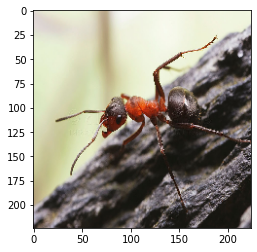

In [ ]:
img_path = os.path.join(os.getcwd(),'/content/drive/MyDrive/Хакатон_2021_DreamTeam-2/Наши фотографии/ant.jpg')
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Преобразуем изображение в массив

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

Запускаем распознавание

In [ ]:
prediction = model.predict(x)

Печатаем результаты распознавания

In [ ]:
prediction

array([[0.9951147 , 0.00311339, 0.00177188]], dtype=float32)

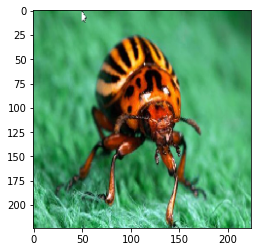

array([[0.14585045, 0.6674031 , 0.18674652]], dtype=float32)

In [ ]:
img_path = os.path.join(os.getcwd(),'/content/drive/MyDrive/Хакатон_2021_DreamTeam-2/Наши фотографии/колорадский жук.jpg')
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
prediction

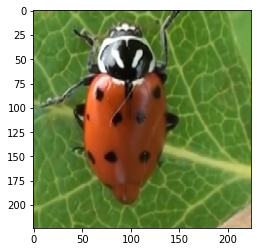

array([[0.01936921, 0.03034645, 0.9502843 ]], dtype=float32)

In [ ]:
img_path = os.path.join(os.getcwd(),'/content/drive/MyDrive/Хакатон_2021_DreamTeam-2/Наши фотографии/ladybug.jpg')
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
prediction